# Part 1


## 1a

In [1]:

import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("atlas_z_to_ll.csv",skiprows =1,delimiter=',')
pt1=data[:,0]
pt2=data[:,1]
eta1=data[:,2]
eta2=data[:,3]
phi1=data[:,4]
phi2=data[:,5]
E1=data[:,6]
E2=data[:,7]

## 1b & 1c

Text(0.5, 1.0, 'Mass of Original Particle Histogram ')

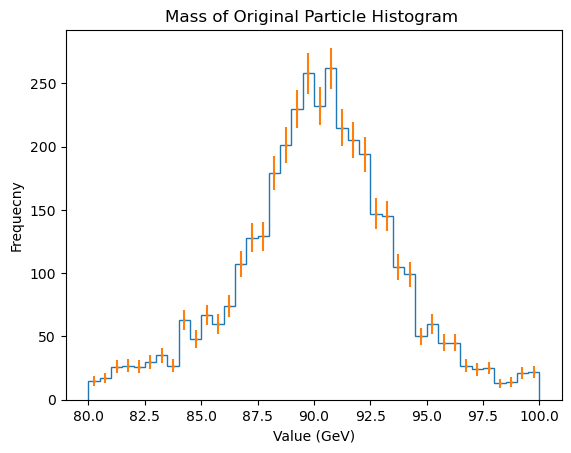

In [2]:
def px (pt,phi):
    px = pt*np.cos(phi)
    return px

px1 = px(pt1,phi1)
px2 = px(pt2,phi2)

def py (pt,phi):
    py = pt*np.sin(phi)
    return py

py1 = py(pt1,phi1)
py2 = py(pt2,phi2)

def pz (pt,eta):
    pz = pt*np.sinh(eta)
    return pz

pz1 = pz(pt1,eta1)
pz2 = pz(pt2,eta2)

def sum_pt(p1, p2):
    ptot=p1+p2
    return ptot

px_tot=sum_pt(px1, px2)
py_tot=sum_pt(py1, py2)
pz_tot=sum_pt(pz1, pz2)

E=E1+E2

M = np.sqrt(E**2-(px_tot**2 + py_tot**2 + pz_tot**2))

fig,ax=plt.subplots(1,1)
bins=np.linspace(80,100,41)
n, bins, patches= ax.hist(M, bins=bins, histtype='step')
sigma=np.sqrt(n)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax.errorbar(bin_centers, n, sigma,fmt='o',markersize=1)
ax.set_xlabel("Value (GeV)")
ax.set_ylabel("Frequecny")
ax.set_title("Mass of Original Particle Histogram ")

# Part 2

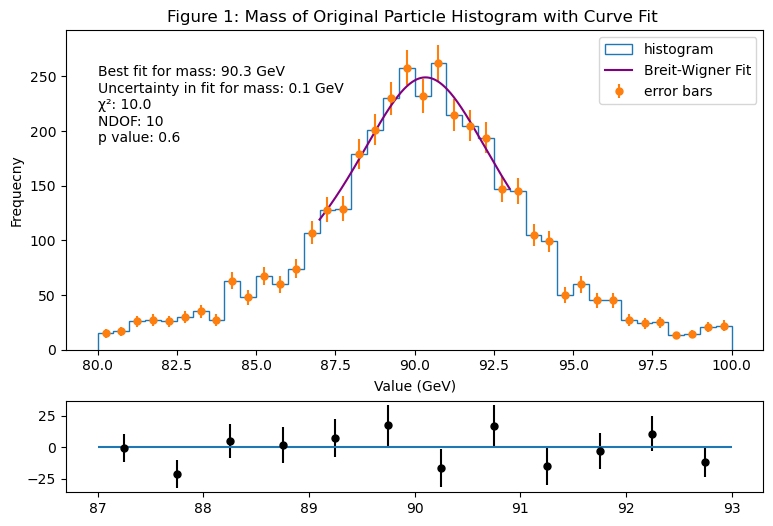

In [3]:

pi=np.pi
N = 5000

def Decays(m, m0, gamma):
    D=(N/2)*(1/pi)*((gamma/2)/((m-m0)**2+((gamma/2)**2)))
    return D

from scipy.optimize import curve_fit

mask = (bin_centers > 87) & (bin_centers < 93)
x_fit = bin_centers[mask]
y_fit = n[mask]
y_err_fit = sigma[mask]
p0=[90,6]
params, covar = curve_fit(Decays, x_fit, y_fit, p0=p0, sigma=y_err_fit, absolute_sigma=True)
errs = np.sqrt(np.diag(covar))

M_fitted = params[0]
M_error = errs[0]
Gamma_fitted= params[1]
Gamma_error = errs[1]

M = np.sqrt(E**2-(px_tot**2 + py_tot**2 + pz_tot**2))
Data_fit= Decays(M, M_fitted, Gamma_fitted)


xfit_vals = np.linspace(87, 93,1000)

fit_vals = Decays(xfit_vals, M_fitted, Gamma_fitted)
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, sharex=False, figsize=(9, 6),
    gridspec_kw={'height_ratios': [7, 2], 'hspace': 0.25})
bins=np.linspace(80,100,41)
n, bins, patches= ax_top.hist(M, bins=bins, histtype='step',label='histogram')
sigma=np.sqrt(n)
bin_centers = 0.5 * (bins[1:] + bins[:-1])


n_fit=n[mask]
bin_centers_fit=bin_centers[mask]
ytheory = Decays(bin_centers_fit, M_fitted, Gamma_fitted)

chisqvalues= np.zeros(len(bin_centers))
the_chisq = (n_fit-ytheory)**2/y_err_fit**2
chisqvalue= np.sum(the_chisq)
reduced_chi=chisqvalue/(len(ytheory)-2)

import scipy.stats as st
pvalue = st.chi2.sf(chisqvalue,len(bin_centers_fit))


ax_top.errorbar(bin_centers, n, sigma,fmt='o',markersize=5, label='error bars')
ax_top.set_xlabel("Value (GeV)")
ax_top.set_ylabel("Frequecny")
ax_top.set_title("Figure 1: Mass of Original Particle Histogram with Curve Fit ")
ax_top.plot(xfit_vals, fit_vals, label='Breit-Wigner Fit', color='purple')
ax_top.legend()
ax_top.annotate(text=f'Best fit for mass: {M_fitted:.1f} GeV', xy=(80, 250), xytext=(80, 250))
ax_top.annotate(text=f'Uncertainty in fit for mass: {M_error:.1f} GeV', xy=(80, 245), xytext=(80, 235))
ax_top.annotate(text=f'χ²: {chisqvalue:.1f}', xy=(80, 245), xytext=(80, 220))
ax_top.annotate(text=f'NDOF: 10 ', xy=(80, 245), xytext=(80, 205))
ax_top.annotate(text=f'p value: {pvalue:.1f}', xy=(80, 245), xytext=(80, 190))

residuals = n_fit-ytheory
ax_bot.errorbar(bin_centers_fit, residuals, y_err_fit,fmt='ok',markersize=5, label='error bars')

ax_bot.hlines(0,87,93)




# Part 3

C:\Users\erik_\AppData\Local\Temp\ipykernel_3300\1034256421.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


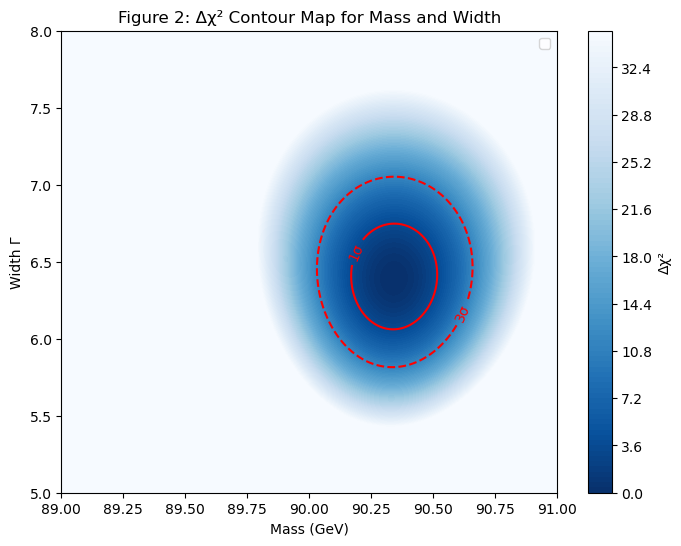

In [8]:
n_bins = 300
M = np.linspace(89, 91, n_bins)
width = np.linspace(5, 8, n_bins)

mask = (bin_centers > 87) & (bin_centers < 93)
x_masked = bin_centers[mask]
y_masked = n[mask]
y_err_masked = sigma[mask]

chi_map = np.zeros((n_bins, n_bins))

for i in range(n_bins):
    for j in range(n_bins):
        theory = Decays(x_masked, M[i], width[j])
        chi2 = np.sum((theory - y_masked)**2 / y_err_masked**2)
        chi_map[j, i] = chi2

chi_min = np.min(chi_map)
chi_map= np.clip(chi_map, chi_min, chi_min+35) 
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(M, width)
fig2, ax2 = plt.subplots(figsize=(8, 6))
cs = ax2.contourf(X, Y, delta_chi_map, 100, cmap="Blues_r")
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label("Δχ²")

levels = [3.5, 11.3] 
CS = ax2.contour(X, Y, delta_chi_map, levels=levels ,colors=["red", "red"],
                 linestyles=["solid", "dashed"])
from matplotlib.lines import Line2D  


ax2.legend(handles=custom_lines)
ax2.set_xlabel("Mass (GeV)")
ax2.set_ylabel("Width Γ")
ax2.set_title("Figure 2: Δχ² Contour Map for Mass and Width")
ax2.clabel(CS, inline=True, fontsize=10, fmt={3.5: '1σ', 11.3: '3σ'})
ax2.legend()